In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import sys

# ensure repo root is on path (notebook is assumed to be in repo_root/notebooks/)
ROOT = Path.cwd().resolve().parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

In [3]:
DATA_PATH = Path("../data/figure_data.xlsx")

### Fig. 2b

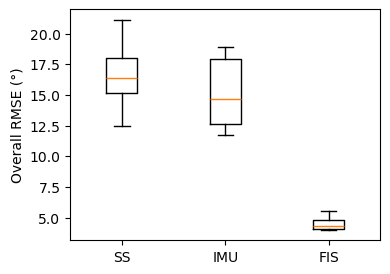

In [4]:
df = pd.read_excel(DATA_PATH, sheet_name="Fig. 2b", header=2)

plt.figure(figsize=(4, 3))
plt.boxplot([df["SS-only"], df["IMU-only"], df["FIS"]])
plt.ylabel("Overall RMSE (°)")
plt.xticks([1, 2, 3], ["SS", "IMU", "FIS"])
plt.show()

### Fig. 2c

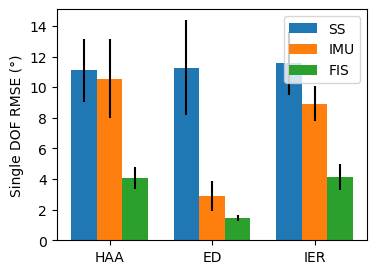

In [5]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 2c",
    header=None,
    skiprows=4
)

ss  = df.iloc[:, 1:4].to_numpy()
imu = df.iloc[:, 4:7].to_numpy()
fis = df.iloc[:, 7:10].to_numpy()

means = [ss.mean(0), imu.mean(0), fis.mean(0)]
stds  = [ss.std(0, ddof=1), imu.std(0, ddof=1), fis.std(0, ddof=1)]

x = np.arange(3)
w = 0.25

plt.figure(figsize=(4, 3))
plt.bar(x - w, means[0], yerr=stds[0], width=w, label="SS")
plt.bar(x,     means[1], yerr=stds[1], width=w, label="IMU")
plt.bar(x + w, means[2], yerr=stds[2], width=w, label="FIS")

plt.xticks(x, ["HAA", "ED", "IER"])
plt.ylabel("Single DOF RMSE (°)")
plt.legend()
plt.show()


### Fig. 2d

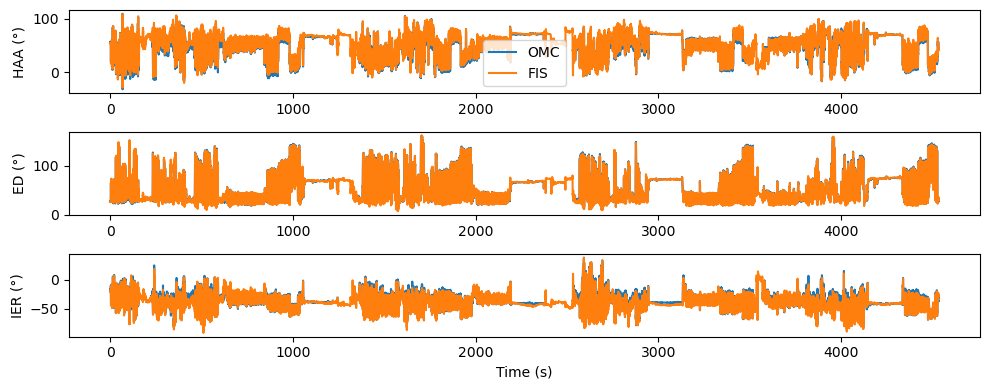

In [6]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 2d",
    header=None,
    skiprows=3
)

t = df.iloc[:, 0]
omc = df.iloc[:, 1:4]   # HAA, ED, IER
fis = df.iloc[:, 4:7]   # HAA, ED, IER

ylabels = ["HAA (°)", "ED (°)", "IER (°)"]

plt.figure(figsize=(10, 4))

for i in range(3):
    ax = plt.subplot(3, 1, i+1)
    ax.plot(t, omc.iloc[:, i], label="OMC" if i == 0 else None)
    ax.plot(t, fis.iloc[:, i], label="FIS" if i == 0 else None)
    ax.set_ylabel(ylabels[i])

plt.xlabel("Time (s)")
plt.subplot(3, 1, 1).legend()
plt.tight_layout()
plt.show()

### Fig. 2e

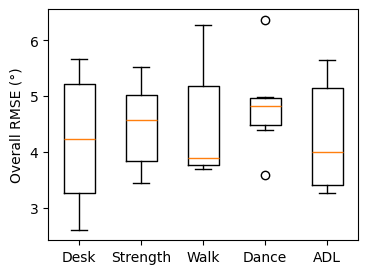

In [7]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 2e",
    header=None,
    skiprows=2
)

labels = df.iloc[0, 1:6].tolist()
data = df.iloc[1:, 1:6].to_numpy() 

plt.figure(figsize=(4, 3))
plt.boxplot(data)
plt.ylabel("Overall RMSE (°)")
plt.xticks(range(1, 6), labels)
plt.show()

### Fig. 2f

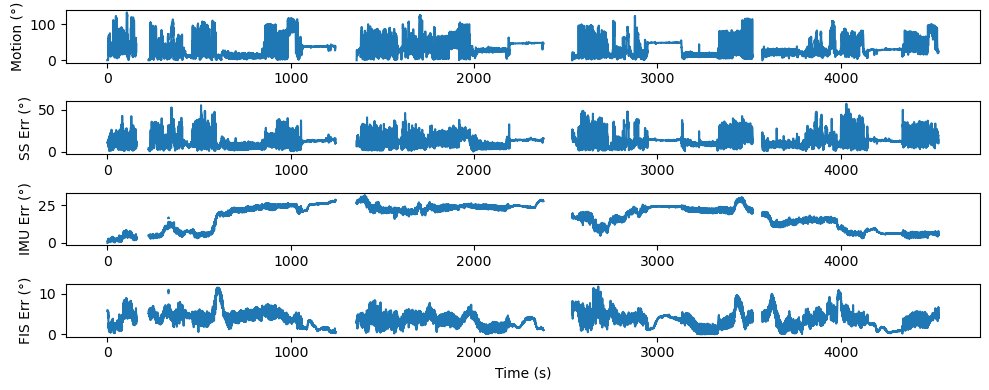

In [8]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 2f",
    header=None,
    skiprows=3
)

t = df.iloc[:, 0] # Time
signals = [
    df.iloc[:, 1],  # Shoulder motion
    df.iloc[:, 2],  # SS-only error
    df.iloc[:, 3],  # IMU-only error
    df.iloc[:, 4],  # FIS error
]

labels = ["Motion (°)", "SS Err (°)", "IMU Err (°)", "FIS Err (°)"]

plt.figure(figsize=(10, 4))

for i, (y, ylabel) in enumerate(zip(signals, labels)):
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(t, y)
    ax.set_ylabel(ylabel)

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

### Fig. 3a

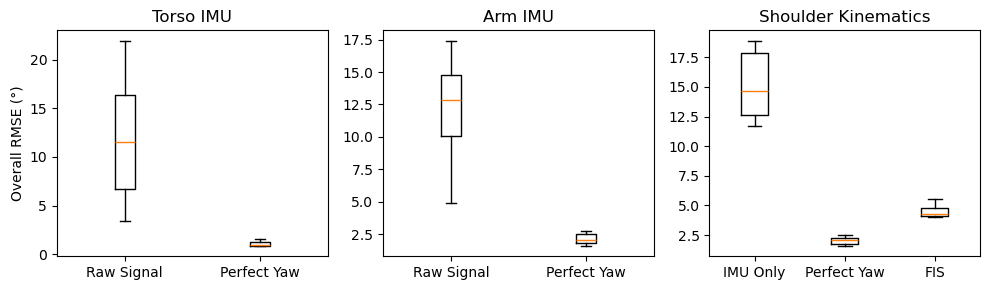

In [9]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 3a",
    header=None,
    skiprows=3
)

groups = [
    (["Raw Signal", "Perfect Yaw"], [1, 2], "Torso IMU"),
    (["Raw Signal", "Perfect Yaw"], [3, 4], "Arm IMU"),
    (["IMU Only", "Perfect Yaw", "FIS"], [5, 6, 7], "Shoulder Kinematics"),
]

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

for ax, (labels, cols, title) in zip(axs, groups):
    data = [df.iloc[:, c] for c in cols]
    ax.boxplot(data)
    ax.set_title(title)
    ax.set_xticks(range(1, len(labels) + 1))
    ax.set_xticklabels(labels)

axs[0].set_ylabel("Overall RMSE (°)")
plt.tight_layout()
plt.show()

### Fig. 3b

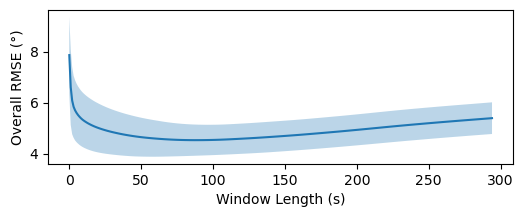

In [16]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 3b",
    header=None,
    skiprows=3
)

x = df.iloc[:, 0]                  # window length (s)
y = df.iloc[:, 1:7].to_numpy()     # participants 1–6

mean = y.mean(axis=1)
std  = y.std(axis=1, ddof=1)

plt.figure(figsize=(6, 2))
plt.plot(x, mean)
plt.fill_between(x, mean - std, mean + std, alpha=0.3)

plt.xlabel("Window Length (s)")
plt.ylabel("Overall RMSE (°)")
plt.show()

### Fig. 3c

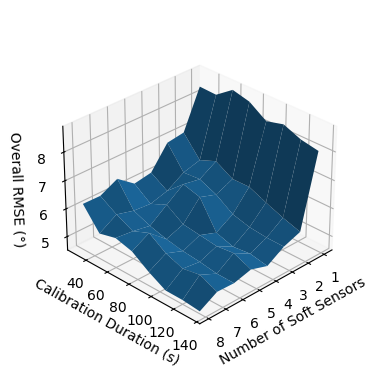

In [11]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 3c",
    header=None
)

# read blocks
X = df.iloc[2:10, 0:9].astype(int).to_numpy()     # sensors
Y = df.iloc[13:21, 0:9].astype(int).to_numpy()    # calibration duration
Z = df.iloc[24:32, 0:9].astype(float).to_numpy()  # RMSE

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z)
ax.view_init(elev=30, azim=45)

ax.set_xlabel("Number of Soft Sensors")
ax.set_ylabel("Calibration Duration (s)")
ax.set_zlabel("Overall RMSE (°)")
ax.set_box_aspect(None, zoom=0.8)
plt.show()

### Fig. 3d

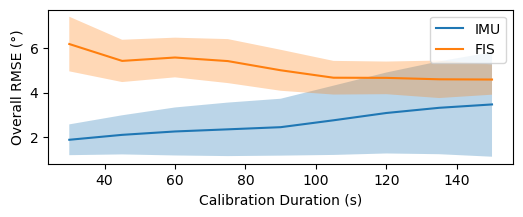

In [15]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 3d",
    header=None,
    skiprows=3
)

x = df.iloc[:, 0].astype(float).to_numpy() # calibration duration

blocks = {
    "IMU": df.iloc[:, 9:15].astype(float).to_numpy(),
    "FIS": df.iloc[:, 1:7].astype(float).to_numpy(),
}

plt.figure(figsize=(6, 2))

for label, y in blocks.items():
    m = y.mean(1)
    s = y.std(1, ddof=1)
    plt.plot(x, m, label=label)
    plt.fill_between(x, m - s, m + s, alpha=0.3)

plt.xlabel("Calibration Duration (s)")
plt.ylabel("Overall RMSE (°)")
plt.legend()
plt.show()

### Fig. 3e

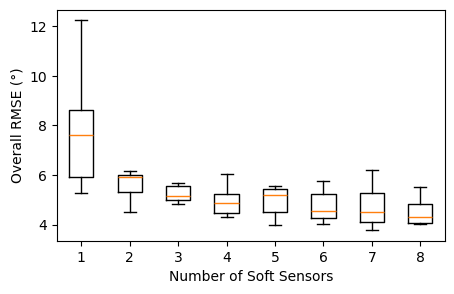

In [13]:
df = pd.read_excel(
    DATA_PATH,
    sheet_name="Fig. 3e",
    header=None,
    skiprows=2
)

data = df.iloc[:, 1:].astype(float).to_numpy()

plt.figure(figsize=(5, 3))
plt.boxplot(data)
plt.xlabel("Number of Soft Sensors")
plt.ylabel("Overall RMSE (°)")
plt.show()